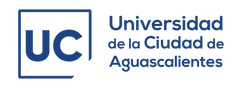

# **METODOS NUMERICOS II**

<font color=blue size=3>*Recuerda realizar una copia del archivo a tu drive*</font>

### Distribuciones de frecuencia para variables cuantitativas

## Accesando a la base de datos

In [6]:
import numpy as np
import pandas as pd

df = pd.read_csv("s12_base.csv")
df.shape
df.head()

,CodPostal,Sexo,Edad,Color,Años_Estudio,Renta,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


0 = Femenino

1 = Masculino

# <font color=green>TECNICAS DE MUESTREO</font>
***

## <font color=green>Población y muestra</font>
***

### Población
Conjunto de todos los elementos de interés en un estudio. Varios elementos pueden componer una población, por ejemplo: personas, edades, alturas, automóviles, etc.

En cuanto al tamaño, las poblaciones pueden ser limitadas (poblaciones finitas) o ilimitadas (poblaciones infinitas).

### Muestra
Subconjunto representativo de la población.

Los atributos numéricos de una población, como su media, varianza y desviación estándar, se conocen como **parámetros**. El objetivo principal de la inferencia estadística es precisamente generar estimaciones y probar hipótesis sobre los parámetros de la población utilizando información muestral.

## <font color=green>¿Cuándo usar una muestra?</font>
***

### Poblaciones infinitas

El estudio nunca llegaría a su fin. No es posible investigar todos los elementos de la población.

### Pruebas destructivas

Estudios donde los elementos evaluados son totalmente consumidos o destruidos. Ejemplo: pruebas de vida útil, pruebas de seguridad de choque en automóviles.

### Resultados rápidos

Encuestas que necesitan más agilidad en la divulgación. Ejemplo: encuestas de opinión, encuestas sobre temas de salud pública.

### Precios Elevados

Cuando la población es finita pero muy grande, el costo de un censo puede hacer inviable el proceso.

## <font color=green>Muestreo aleatorio simple</font>
***

Es una de las principales formas de extraer una muestra de una población. El requisito fundamental de este tipo de enfoque es que cada elemento de la población tenga las mismas posibilidades de ser seleccionado para formar parte de la muestra.

In [7]:
df.shape

(76840, 7)

In [9]:
df.Renta.describe()

count     76840.000000
mean       2000.383199
std        3323.387730
min           0.000000
25%         788.000000
50%        1200.000000
75%        2000.000000
max      200000.000000
Name: Renta, dtype: float64

In [12]:
muestra = df.sample(n = 1000, random_state=101)

In [14]:
muestra.Renta.describe()

count     1000.0000
mean      1998.7830
std       3101.4126
min          0.0000
25%        788.0000
50%       1162.5000
75%       2000.0000
max      35000.0000
Name: Renta, dtype: float64

In [17]:
df.Sexo.value_counts(normalize = True)

0    0.692998
1    0.307002
Name: Sexo, dtype: float64

In [19]:
muestra.Sexo.value_counts(normalize= True)

0    0.706
1    0.294
Name: Sexo, dtype: float64

## <font color=green>Muestreo estratificado</font>
***

Es una mejora del proceso de muestreo aleatorio simple. Este método propone la división de la población en subgrupos de elementos con características similares, es decir, grupos más homogéneos. Con estos subgrupos separados, se aplica la técnica de muestreo aleatorio simple dentro de cada subgrupo individualmente.

## <font color=green>Muestreo por conglomerados</font>
***

También pretende mejorar el criterio de muestreo aleatorio simple. En el muestreo por conglomerados también se crean subgrupos, pero no serán homogéneos como en el muestreo estratificado. En el muestreo por conglomerados, los subgrupos serán heterogéneos, por lo que se aplicará un muestreo aleatorio simple o estratificado.

Un ejemplo muy común de la aplicación de este tipo de técnicas es en la división de la población en grupos territoriales, donde los elementos investigados tendrán características muy variadas.

# <font color=green>INTERVALO DE CONFIANZA</font>
***

Es una forma de hacer suposiciones generalizadas sobre los parámetros de una población con base en la información de una muestra.

- **Parámetros** son atributos numéricos de una población, como la media, la desviación estándar, etc.

- **Estimativa** es el valor obtenido para un determinado parámetro a partir de datos de una muestra de la población.

## <font color=green>Teorema del límite central</font>
***

> El **Teorema del límite central** establece que, a medida que aumenta el tamaño de la muestra, la distribución de las medias muestrales se aproxima a una distribución normal con una media igual a la media de la población y una desviación estándar igual a la desviación estándar de la variable original dividida por la raíz cuadrada del tamaño de la muestra. Este hecho es válido para $n$ mayor o igual a 30.

# $$\sigma_\bar{x} = \frac{\sigma}{\sqrt{n}}$$

La desviación estándar de las medias muestrales se conoce como **error estándar de la media**

### Comprendiendo el teorema del límite central

In [20]:
n = 2000
total_muestras = 1500

In [21]:
muestras = pd.DataFrame()
muestras

""


In [26]:
for i in range(total_muestras):
    _ = df.Edad.sample(n)
    _.index = range(0, len(_))
    muestras["Muestra_" + str(i)] = _

/tmp/ipykernel_19288/2388187530.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras["Muestra_" + str(i)] = _
/tmp/ipykernel_19288/2388187530.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras["Muestra_" + str(i)] = _
/tmp/ipykernel_19288/2388187530.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe

In [27]:
muestras

,Muestra_0,Muestra_1,Muestra_2,Muestra_3,Muestra_4,Muestra_5,Muestra_6,Muestra_7,Muestra_8,Muestra_9,...,Muestra_1490,Muestra_1491,Muestra_1492,Muestra_1493,Muestra_1494,Muestra_1495,Muestra_1496,Muestra_1497,Muestra_1498,Muestra_1499
0,49,65,24,51,39,37,37,50,51,41,...,59,44,37,41,54,32,25,29,46,54
1,39,58,61,50,49,35,19,60,33,73,...,48,42,79,35,46,63,57,57,34,42
2,36,46,48,54,55,50,31,37,38,41,...,54,26,65,45,60,50,44,60,69,46
3,57,54,39,47,24,55,46,64,51,67,...,40,36,66,43,39,52,37,33,31,57
4,31,52,43,25,38,43,67,51,56,41,...,60,72,41,38,60,42,31,54,32,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,51,41,43,29,53,37,33,43,22,36,...,57,34,32,28,26,72,37,37,36,30
1996,20,65,54,72,42,51,34,43,47,35,...,66,36,60,68,55,52,35,24,33,38
1997,50,39,31,59,57,25,27,19,33,50,...,46,26,26,31,45,20,27,34,36,39
1998,40,37,47,37,36,60,32,55,49,26,...,45,34,51,70,47,63,39,48,33,45


> El teorema del límite central establece que **a medida que aumenta el tamaño de la muestra, la distribución de las medias de la muestra se aproxima a una distribución normal** con una media igual a la media de la población y una desviación estándar igual a la desviación estándar de la variable original dividida por la raíz cuadrada del tamaño de la muestra. Este hecho es válido para n mayor o igual a 30.

<AxesSubplot: >

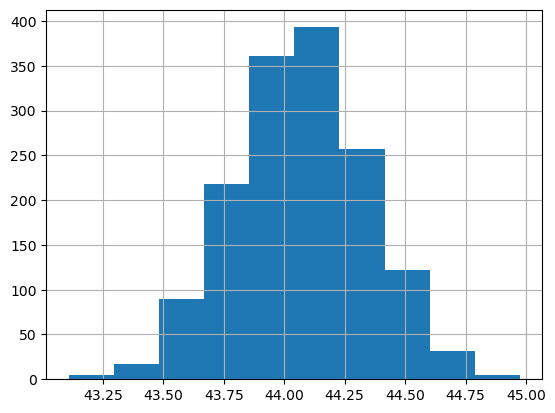

In [28]:
muestras.mean().hist()

> El teorema del límite central establece que, al aumentar el tamaño de la muestra, la distribución de las medias muestrales se aproxima a una distribución normal **con una media igual a la media poblacional** y una desviación estándar igual a la desviación estándar de la variable original dividida por la raíz cuadrada del tamaño de la muestra. Este hecho es válido para n mayor o igual a 30.

In [29]:
df.Edad.mean()

44.07142113482561

In [31]:
muestras.mean().mean()

44.06895866666666

> El teorema del límite central establece que, al aumentar el tamaño de la muestra, la distribución de las medias muestrales se aproxima a una distribución normal con media igual a la media poblacional y **desviación estándar igual a la desviación estándar de la variable original dividida por la raíz cuadrada del tamaño de la muestra**. Este hecho es válido para n mayor o igual a 30.

# $$\sigma_\bar{x} = \frac{\sigma}{\sqrt{n}}$$

In [35]:
num =df.Edad.std()

In [34]:
den = np.sqrt(n)


In [36]:
num/den

0.2790743302740527

In [37]:
muestras.mean().std()

0.27472779351916693